In [243]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [244]:
# load in file into a pandas dataframe
df = pd.read_csv('data/titanic/titanic.csv', index_col=0)

In [245]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [246]:
# cecking shape and information
print("Shape (rows, columns): ", df.shape, "\n")

df.info()

Shape (rows, columns):  (891, 11) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### What is the distribution of numerical feature values across the samples?

In [247]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [248]:
print(df['Age'].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]))
print("-"*40,"\n")
print(df['Fare'].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]))

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
99%       65.870000
max       80.000000
Name: Age, dtype: float64
---------------------------------------- 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
99%      249.006220
max      512.329200
Name: Fare, dtype: float64


- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.


### What is the distribution of categorical features?

In [249]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Harper, Rev. John",male,1601,G6,S
freq,1,577,7,4,644



- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).


## Handling Missing Data

In [250]:
#check which features have missing values
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [251]:
# fill missing embark values
m_embarked = df[df['Embarked'].isnull()]
m_embarked

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [252]:
# we could impute the most frequent value as only 2 instances are missing
print("Mode: ", df['Embarked'].mode())

Mode:  0    S
dtype: object


In [253]:
# additionally because they both have paid the same ticket price
# and are first class passengers, we can try using that to find out where they embarked.
print('Mean:')
print(df[['Embarked', 'Pclass', 'Fare']].groupby(['Pclass', 'Embarked']).mean())
print('-'*40, '\n')
print('Median:')
print(df[['Embarked', 'Pclass', 'Fare']].groupby(['Pclass', 'Embarked']).median())

Mean:
                       Fare
Pclass Embarked            
1      C         104.718529
       Q          90.000000
       S          70.364862
2      C          25.358335
       Q          12.350000
       S          20.327439
3      C          11.214083
       Q          11.183393
       S          14.644083
---------------------------------------- 

Median:
                    Fare
Pclass Embarked         
1      C         78.2667
       Q         90.0000
       S         52.0000
2      C         24.0000
       Q         12.3500
       S         13.5000
3      C          7.8958
       Q          7.7500
       S          8.0500


The mean is not conclusive between Q and S for PClass=1, and the median analysis seems to point to C, let's try looking at values for female passengers

In [254]:
print('Mean:')
print(df.loc[df['Sex'] == 'female', ['Embarked', 'Pclass', 'Fare']].groupby(['Pclass', 'Embarked']).mean())
print('-'*40, '\n')
print('Median:')
print(df.loc[df['Sex'] == 'female', ['Embarked', 'Pclass', 'Fare']].groupby(['Pclass', 'Embarked']).median())

Mean:
                       Fare
Pclass Embarked            
1      C         115.640309
       Q          90.000000
       S          99.026910
2      C          25.268457
       Q          12.350000
       S          21.912687
3      C          14.694926
       Q          10.307833
       S          18.670077
---------------------------------------- 

Median:
                    Fare
Pclass Embarked         
1      C         83.1583
       Q         90.0000
       S         79.6500
2      C         24.0000
       Q         12.3500
       S         23.0000
3      C         14.4583
       Q          7.7500
       S         14.4500


Again, mean doesn't tell us much and median points at S, As 'S' is the most common value (as noted by the mode analysis that could be a safe bet. However, let's try a more advanced approach

In [269]:
# Nearest Neighbor analysis
from sklearn.neighbors import NearestNeighbors

temp = df[['Survived', 'Pclass' , 'Fare', 'Sex']]
temp.loc[:,'Sex'] = temp['Sex'].map({'male':0,'female':1})
temp = temp.dropna()

m_embarked_temp = m_embarked[['Survived', 'Pclass' , 'Fare', 'Sex']]
m_embarked_temp.loc[:,'Sex'] = m_embarked['Sex'].map({'male':0,'female':1})


neigh = NearestNeighbors()
neigh.fit(temp)

indexes = neigh.kneighbors(m_embarked_temp, 10, return_distance=False)

df.iloc[indexes[0],:]

C:\Users\nuno_\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


ValueError: could not convert string to float: 'Q'

## Analyze Categorical Features

We start by pivoting on categorical, ordinal and discrete numerical variables

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


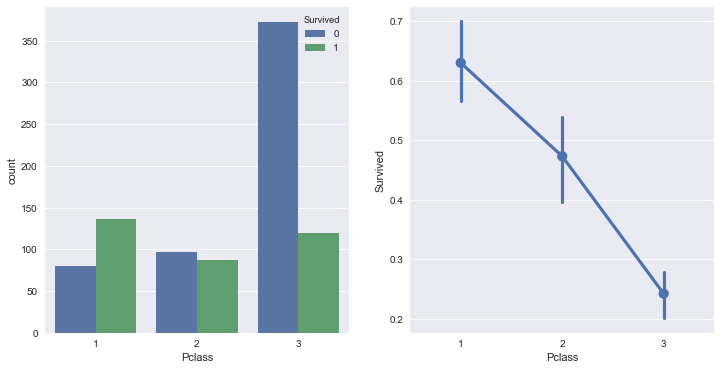

In [256]:
def checkLabelByGroup(data, groupby, label):
    fig = plt.figure(figsize=(12,6))
    ax = plt.subplot(121)
    ax = sns.countplot(x=groupby, hue=label, data=data)
    ax2 = plt.subplot(122)
    ax2 = sns.pointplot(x=groupby, y=label, data=data);
    return df[[groupby, label]].groupby(groupby, as_index=False).mean().sort_values(by=label, ascending=False)


checkLabelByGroup(df, 'Pclass', 'Survived')

,Sex,Survived
0,female,0.742038
1,male,0.188908


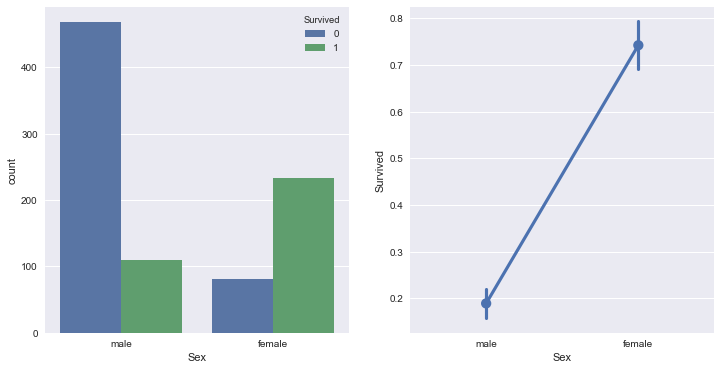

In [257]:
checkLabelByGroup(df, 'Sex', 'Survived')

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


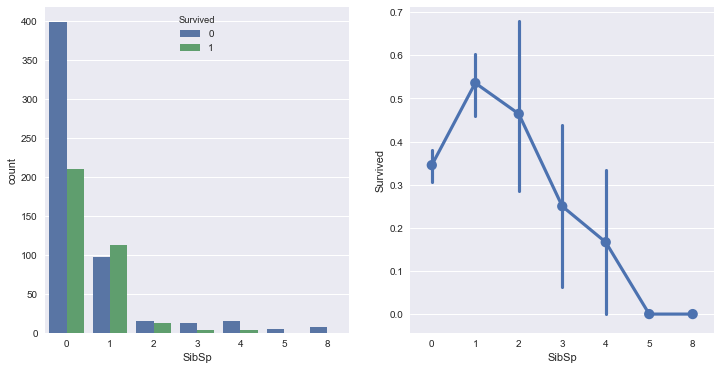

In [258]:
checkLabelByGroup(df, 'SibSp', 'Survived')

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


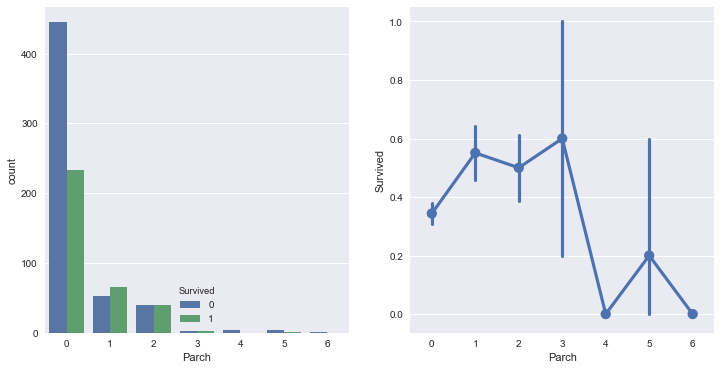

In [259]:
checkLabelByGroup(df, 'Parch', 'Survived')

- **Pclass** We observe a significant relationship between PClass and Survived. We decide to include this feature in our model.
- **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74%
- **SibSp and Parch** It may be best to derive a feature or a set of features from these individual features.

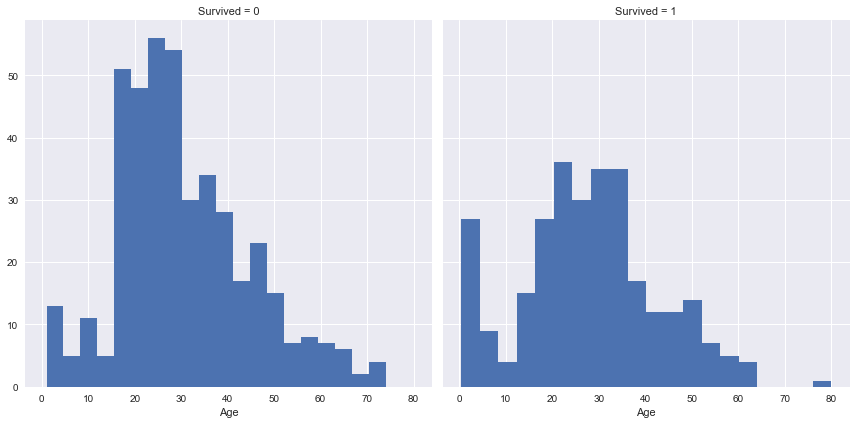

In [260]:
fig = plt.figure(figsize=(12,6))
g = sns.FacetGrid(df, col='Survived', size=6)
g.map(plt.hist, 'Age', bins=20)
plt.show()

ValueError: cannot convert float NaN to integer

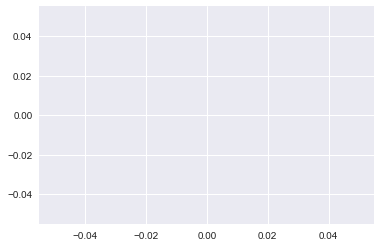

In [261]:
sns.distplot(df['Age'])

In [ ]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();